# Load aggregated damage values per ice shelf
## Making timeseries of area, damage, and Damage-fraction

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd 
import seaborn as sns

# Import user functions
import nbFunctions as myf 


In [2]:
homedir = '/Users/.../'

path2savefig = os.path.join(homedir,'Data/NERD/plots/')

''' --------------
Get Shapefiles 
------------------ '''
# geojson
gridTiles_geojson_path = os.path.join(homedir,'Data/tiles/gridTiles_iceShelves_EPSG3031.geojson')
gridTiles = gpd.read_file(gridTiles_geojson_path)

# measures ice shelves
iceshelf_path_meas = os.path.join(homedir, 'QGis/Quantarctica/Quantarctica3/Glaciology/MEaSUREs Antarctic Boundaries/IceShelf/IceShelf_Antarctica_v02.shp')
iceshelf_poly_meas = gpd.read_file(iceshelf_path_meas)

## redefined: SECTORS for AIS
# sector_path = os.path.join(homedir, 'QGis/data_NeRD/plot_insets_AIS_sectors.shp')
sector_path = os.path.join(homedir, 'QGis/data_NeRD/AIS_outline_sectors.shp')
sector_poly = gpd.read_file(sector_path)
sector_ID_list = sector_poly['sector_ID'].to_list()
sector_ID_list.sort()
sector_ID_list

['ASE', 'BSE', 'EIS', 'RS', 'WIS', 'WIS-a', 'WIS-b', 'WS', 'WS-a', 'WS-b']

# Plot settings

In [27]:
from cycler import cycler

# plt.rcParams.update({'font.size': 16})
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18
fs=14
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


''' --------
COLORS
-----------'''

# cubeH_palette
print('cubeH_palette for sectors')
cubeH_palette = sns.color_palette("cubehelix", 9)[2:-1]
display(sns.color_palette(cubeH_palette))

## Can look for different shades of HEX here: https://www.color-hex.com/color/721f82

## DMG cmap
# 
### Damage classes
magma_palette_r = sns.color_palette('magma_r',5) # ['#3b0f70', '#8c2981', '#de4968', '#fe9f6d']
bblue_rgb = (0.6352941176470588, 0.8117647058823529, 0.996078431372549)
magma_palette_r.insert(0,bblue_rgb)
print('magma_palette for dmg')
display(magma_palette_r)


### Timeseires 1997; 2015-2021
my_palette = sns.color_palette('crest',5) # can access i'th color by indexing
my_palette2 = ['salmon']+ my_palette
rgb_salmon = np.array([250,128,114])/255

my_palette2long = ['salmon']+ sns.color_palette('crest',7) 
rgb_salmon = tuple(np.array([250,128,114])/255)
my_palette2long = [rgb_salmon]+ sns.color_palette('crest',7) 
my_palette2rgb = [tuple(rgb_salmon)] + my_palette2long[1:] # only rgb values
print('Palette-long')
display(sns.color_palette(my_palette2rgb))

print('magma palette : ', magma_palette_r.as_hex()) #[ '#A2CEFE',    '#FFAF78',    '#F1675D',    '#B54279',    '#721F82',    '#2B114F']
print('Palette-long: ', sns.color_palette(my_palette2long).as_hex()) 



cubeH_palette for sectors


[(0.11789134778719829, 0.39694259707734425, 0.2588678372388254),
 (0.3292772926340829, 0.4762845556584382, 0.1837155549758328),
 (0.6328422475018423, 0.4747981096220677, 0.29070209208025455),
 (0.8146245329198283, 0.49548316572322215, 0.5752525936416857),
 (0.812420762188067, 0.6167295569758052, 0.8578575836301946),
 (0.7587183008012618, 0.7922069335474338, 0.9543861221913403)]

magma_palette


[(0.6352941176470588, 0.8117647058823529, 0.996078431372549),
 (0.997077, 0.690088, 0.471811),
 (0.944006, 0.377643, 0.365136),
 (0.709962, 0.212797, 0.477201),
 (0.445163, 0.122724, 0.506901),
 (0.171713, 0.067305, 0.370771)]

Palette-long


[(0.9803921568627451, 0.5019607843137255, 0.4470588235294118),
 (0.50711872, 0.73665492, 0.56821764),
 (0.37890483, 0.66859548, 0.56566462),
 (0.28251558, 0.59517119, 0.56181204),
 (0.20094292, 0.52087429, 0.55342884),
 (0.12709242, 0.44601517, 0.54438795),
 (0.11646936, 0.36578429, 0.52726234),
 (0.15138673, 0.27982444, 0.49119848)]

magma palette_r :  ['#a2cffe', '#feb078', '#f1605d', '#b5367a', '#721f81', '#2c115f']
Palette-long: temporal_pallete 1997+crest :  ['#fa8072', '#81bc91', '#61aa90', '#48988f', '#33858d', '#20728b', '#1e5d86', '#27477d']


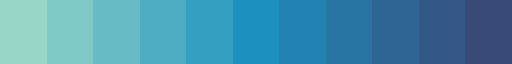

In [10]:
import matplotlib.colors as mcolors
import numpy as np

def make_cmap(start_color, end_color, middle_color=None , n_colors=11):
    if middle_color is not None:

        colors = [start_color]

        for i in range(1, n_colors - 1):
            if i < n_colors / 2:
                # Interpolate between the start color and the middle color
                r = start_color[0] + (middle_color[0] - start_color[0]) * (i / (n_colors / 2))
                g = start_color[1] + (middle_color[1] - start_color[1]) * (i / (n_colors / 2))
                b = start_color[2] + (middle_color[2] - start_color[2]) * (i / (n_colors / 2))
            else:
                # Interpolate between the middle color and the end color
                r = middle_color[0] + (end_color[0] - middle_color[0]) * ((i - n_colors / 2) / (n_colors / 2))
                g = middle_color[1] + (end_color[1] - middle_color[1]) * ((i - n_colors / 2) / (n_colors / 2))
                b = middle_color[2] + (end_color[2] - middle_color[2]) * ((i - n_colors / 2) / (n_colors / 2))
            
            colors.append((r, g, b))
        colors.append(end_color)
        custom_colormap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', colors, N=n_colors)
    else:
        colors =[start_color, end_color]
        custom_colormap = mcolors.LinearSegmentedColormap.from_list('custom_colormap', colors, N=n_colors)

    return custom_colormap 

## Npx hex
c1 = '#98d7c8' # '#7FCDBB'
c2 = '#081D58'
cmap_blues = make_cmap( c1,  c2, middle_color=None , n_colors=11) 
cmap_blues = mcolors.LinearSegmentedColormap.from_list('custom_colormap', ['#98d7c8','#1d91c0','#394a79'], N=11)
cmap_blues


# Load Data

In [11]:
   
def load_df_years_AIS(filelist, yearlist,path2files, sector_df):
    df_data=pd.DataFrame()

    ## make sure partial-sectors are discarded, only intersect geometries with large sectors
    
    sector_df = sector_df.drop(sector_df.index[ sector_df['sector_ID'].isin(
                            ['WS-a','WS-b','WIS-a','WIS-b']) ], axis=0)
    
    print(f"Loading {len(filelist)} files")#.format(year))
    for year in yearlist:
        # print("Loading {}".format(year))

        df_year_AIS_file = [file for file in filelist if str(year) in file][0]

        ## Load data
        df_year_AIS = gpd.read_file(os.path.join(path2files,df_year_AIS_file)) ## has geometry, but no column with easy accessible sector_ID

        ## intersect iceshelf gpd with sector for easy data grouping
        df_year_AIS = gpd.sjoin(df_year_AIS, sector_df, how='right').drop(['index_left','x_label','y_label'],axis=1)
        df_year_AIS['time']=year

        df_data = pd.concat([df_data, df_year_AIS])
    return df_data

In [12]:
sector_df = sector_poly.copy()
sector_df


''' ---------
### Load all (downsampled) AIS shapefiles containing the values
------------ '''
## Load file list
path2agg = os.path.join(homedir,'Data/NERD/data_organise/dmg_obs_aggregated_iceShelves_1000m/')
df_file_list = glob.glob(path2agg + 'aggregated_dmg_per_iceshelf_AIS*.shp')
df_file_list.sort()
years_list = [1997, 2000, 2015, 2016,2017,2018,2019,2020,2021]
df_data = load_df_years_AIS(df_file_list, years_list, path2agg, sector_df).sort_values(['NAME','time'])

''' ---------
### Load also the uncertainty bounds: dmg detection with using stricter threshold 
------------ '''
years_list = [1997, 2000]+ list(np.arange(2015,2022)) 

## Load data stricter thresold B
# path2agg = os.path.join(path2data, 'stricter-pct05', subdir)
path2agg = os.path.join(homedir, 'Data/NERD/data_organise/stricter-pct05/') 
df_file_list = glob.glob(path2agg + 'aggregated_dmg_per_iceshelf_AIS*.shp')
df_file_list.sort()
df_data_p05 = load_df_years_AIS(df_file_list, years_list, path2agg, sector_df).sort_values(['NAME','time'])
df_data_p05.head()

df_data

Loading 9 files
Loading 9 files


,NAME,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,sector_ID,sectorNAME,geometry,time
5,Abbot,112.969776,29416,4766,24650,0,2852,1622,292,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",1997
5,Abbot,109.137830,29799,6077,23722,0,3680,2016,381,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2000
5,Abbot,88.529923,28611,5860,22751,0,4224,1300,336,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2015
5,Abbot,65.292487,28513,4971,23542,0,3789,920,262,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2016
5,Abbot,66.973731,28561,2843,25718,0,1687,849,307,BSE,Bellingshausen Sea,"POLYGON ((-1964742.593 -571892.806, -2021808.6...",2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1,Zubchatyy,2.928068,272,53,219,0,11,22,20,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2017
1,Zubchatyy,3.116466,272,83,189,0,38,21,24,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2018
1,Zubchatyy,2.797997,272,84,188,0,38,27,19,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2019
1,Zubchatyy,3.082912,272,82,190,0,32,27,23,WIS,West Indian,"POLYGON ((355417.402 2272581.101, 1130695.760 ...",2020


In [13]:
sector_IDs = df_data['sector_ID'].unique()
sector_IDs.sort()

# Plot timeseires

In [14]:
sectors = df_data['sector_ID'].unique()
# sectors = ['ASE', 'BSE', 'WS','EIS', 'RS' , 'WIS']
sectors.sort()
sectors

array(['ASE', 'BSE', 'EIS', 'RS', 'WIS', 'WS'], dtype=object)

## Plot for few ice shelves

In [40]:
def plot_axes_area_dmg(ax, data_plot, 
                        yvar_left=('#DMG', 'Damage area (px)'), 
                        yvar_right=('Npx', 'Ice shelf area(px)'),
                        yscale_log=False,
                        ax_title = '',
                        ):

    years_plot = [str(y) for y in list(data_plot['time'].unique())]
    x2 = np.arange(1,len(years_plot)+1) # data_plot['time'] #  data_nerd['time']
    ax2 = ax.twinx()

    ''' -----------------
    ## Left y-axis
    ----------------- '''
    ''' Damage Area '''
    # yvar = '#DMG'; yname='Damage area (px)'
    yvar, yname = yvar_left
    ycol='#721f81'; ystyle='^';
    h1= ax.plot(x2[:2], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label=yvar) # 1997;2000
    h1= ax.plot(x2[2:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=yvar) # 2015-2021
    ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_') # my_palette2long) 
    if yscale_log:
        ax.set_yscale('log')
    ax.set_ylabel(yname)

    # Set the color of the right-hand sided y-axis label and tick labels
    ax.yaxis.label.set_color(ycol)
    ax.tick_params(axis='y', colors=ycol,which='both')
    ax.spines['left'].set_color(ycol)

    ## general axis stuff
    ax.set_title(ax_title)
    ax.set_xticks(x2, years_plot, rotation=45) 
    ax.grid('major',color=[0.9, 0.9, 0.9],which='both')
    

    ''' -----------------
    ## Right y-axis
    ----------------- '''
    ''' Ice Shelf Area '''
    yvar, yname = yvar_right
    ycol = '#579a4b'; ystyle='x'
    # h2 = ax2.plot(x2[1:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=yvar)
    h2 = ax2.plot(x2[:2], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label=yvar)
    h2 = ax2.plot(x2[2:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label=yvar)
    ax2.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 

    if yscale_log:
        ax2.set_yscale('log')
    ax2.set_ylabel(yname)
    
    # Set the color of the right-hand sided y-axis label and tick labels
    ax2.yaxis.label.set_color(ycol)
    ax2.tick_params(axis='y', colors=ycol,which='both') # doesnt work
    ax2.spines['right'].set_color(ycol)

    return ax, ax2

def plot_axes_area_dmg_dfrac(ax, data_plot, 
                        yvar_left1=('#DMG', 'Damage area (px)'), 
                        yvar_left2=('Npx', 'Ice shelf area(px)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=False,
                        ax_title = '',
                        add_legend=True,
                        ):
    years_plot = [str(y) for y in list(data_plot['time'].unique())]
    x2 = np.arange(1,len(years_plot)+1) # data_plot['time'] #  data_nerd['time']
    ax2 = ax.twinx()
    ax.grid('major',color=[0.9, 0.9, 0.9],which='both')

    if '2000' in years_plot:
        idx_break=2
    else:
        idx_break=1

    ''' -----------------
    ## Left y-axis
    ----------------- '''
    ''' Damage Area '''
    # yvar = '#DMG'; yname='Damage area (px)'
    yvar, yname = yvar_left1
    ycol='#721f81'; ystyle='^';
    h1= ax.plot(x2[:idx_break], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label='dmg') # 1997;2000
    h1= ax.plot(x2[idx_break:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label='dmg') # 2015-2021
    ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_') # my_palette2long) 

    ## ''' Dmg area Uncertainty '''
    ax.plot(x2[:idx_break], data_plot.loc[data_plot['time']<2014]['D_low'].values, color=ycol,linestyle='-',linewidth=0.5,label='p05') # 2015-2021
    ax.fill_between(x2[:idx_break], data_plot.loc[data_plot['time']<2014]['D_low'], 
                    data_plot.loc[data_plot['time']<2014][yvar], color=ycol, alpha=0.3, label='Uncertainty')
    ax.plot(x2[idx_break:], data_plot.loc[data_plot['time']>2014]['D_low'].values, color=ycol,linestyle='-',linewidth=0.5,label='p05') # 2015-2021
    ax.fill_between(x2[idx_break:], data_plot.loc[data_plot['time']>2014]['D_low'], 
                    data_plot.loc[data_plot['time']>2014][yvar], color=ycol, alpha=0.3, label='Uncertainty')

    if yscale_log:
        ax.set_yscale('log')
    if 'px' in yname:
        ax.set_ylabel('Area (px)')
    if 'km' in yname:
        ax.set_ylabel('Area ($km^2$)')


    ''' Ice Shelf Area '''
    if yvar_left2 is not None:
        # yvar = 'Npx'; yname='Ice shelf area(px)'
        yvar, yname = yvar_left2
        ycol = '#579a4b'; ystyle='x';
        h2 = ax.plot(x2[:idx_break], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label='ishelf')# 1997;2000
        h2 = ax.plot(x2[idx_break:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label='ishelf')# 2015-2021
        ax.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 


    '''## general axis stuff'''

    ax.set_title(ax_title)
    ax.set_xticks(x2, years_plot, rotation=45) 
    # ax.grid('major',color=[0.9, 0.9, 0.9],which='both')
    
    ## add legend
    if add_legend:
        ax.legend()

    ''' -----------------
    ## Right y-axis
    ----------------- '''
    ''' Dmg Frac'''
    yvar = 'Dfrac'; yname='Damage Fraction (%)'
    ycol = '#d3802b'; ystyle='o';
    h2 = ax2.plot(x2[:idx_break], data_plot.loc[data_plot['time']<2014][yvar].values, color=ycol,label='fraction')
    h2 = ax2.plot(x2[idx_break:], data_plot.loc[data_plot['time']>2014][yvar].values, color=ycol,label='fraction')
    ax2.scatter(x2, data_plot[yvar] ,c=ycol,marker=ystyle,label='_nolegend_')# my_palette2long) 
    
    ##  ''' shelf area Uncertainty '''
    ax2.plot(x2[:idx_break], data_plot.loc[data_plot['time']<2014]['Dfrac_low'].values, color=ycol,linestyle='-',linewidth=0.5,label='p05') # 2015-2021
    ax2.fill_between(x2[:idx_break], data_plot.loc[data_plot['time']<2014]['Dfrac_low'], 
                    data_plot.loc[data_plot['time']<2014][yvar], color=ycol, alpha=0.3, label='Uncertainty')
    ax2.plot(x2[idx_break:], data_plot.loc[data_plot['time']>2014]['Dfrac_low'].values, color=ycol,linestyle='-',linewidth=0.5,label='p05') # 2015-2021
    ax2.fill_between(x2[idx_break:], data_plot.loc[data_plot['time']>2014]['Dfrac_low'], 
                    data_plot.loc[data_plot['time']>2014][yvar], color=ycol, alpha=0.3, label='Uncertainty')


    if yscale_log:
        ax2.set_yscale('log')

    ax2.set_ylabel(yname)

    ## make sure the ylims are generous
    ylims = ax2.get_ylim()
    if np.diff(ylims) < 10:
        # print('small % diff: ', ylims)
        ymid = ylims[0]+ np.diff(ylims)/2
        ylim_new = [ymid-5, ymid+5]
        ax2.set_ylim(ylim_new)

    
    # Set the color of the right-hand sided y-axis label and tick labels
    ax2.yaxis.label.set_color(ycol)
    ax2.tick_params(axis='y', colors=ycol,which='both') # doesnt work
    ax2.spines['right'].set_color(ycol)

    # ax2.set_yticklabels(ax2.get_yticks().astype(int)) # dfrac labels as integer

    return ax, ax2
def data_prep(df_data,df_data_low=None, px_res = 1000 ):

    df_data['Dfrac'] = (df_data['#DMG']/df_data['Npx']*100).round(1) 
    ## area in km2 instead of px
    df_data['Area(km2)'] = df_data['Npx']*px_res*px_res/(1e6)
    df_data['DMG(km2)'] = df_data['#DMG']*px_res*px_res/(1e6)
    
    if df_data_low is not None:
        df_data['D_low']     = df_data_low['#DMG']
        df_data['Dfrac_low'] = (df_data_low['#DMG']/df_data_low['Npx']*100).round(1) 

    return df_data

In [15]:


''' ---------------
    Data Prep 
-------------------'''
# df_nerd = df_data.copy() # [~df_data['time'].between(2004, 2014)]
years_nerd = [str(y) for y in list(df_data['time'].unique())]
years_nerd
px_res = 1000 ## used downsampled data

# df_nerd['Dfrac'] = (df_nerd['#DMG']/df_nerd['Npx']*100).round(1) 
# ## area in km2 instead of px
# df_nerd['Area(km2)'] = df_nerd['Npx']*px_res*px_res/(1e6)
# df_nerd['DMG(km2)'] = df_nerd['#DMG']*px_res*px_res/(1e6)

df_nerd = data_prep(df_data.copy(), df_data_p05.copy(),px_res=1000) 

df_p05 = data_prep(df_data_p05.copy(), px_res=1000)


## integrated sector
df_sector_sums = df_data.groupby(['sector_ID','time']).sum().reset_index()
df_sector_lows = df_data_p05.groupby(['sector_ID','time']).sum().reset_index()
df_sector_sum = data_prep(df_sector_sums, df_sector_lows, px_res=1000)

## integrated AIS
df_ais_sums = df_data.groupby(['time']).sum().reset_index()
df_ais_lows = df_data_p05.groupby(['time']).sum().reset_index()
df_ais_sum = data_prep(df_ais_sums, df_ais_lows, px_res=1000)


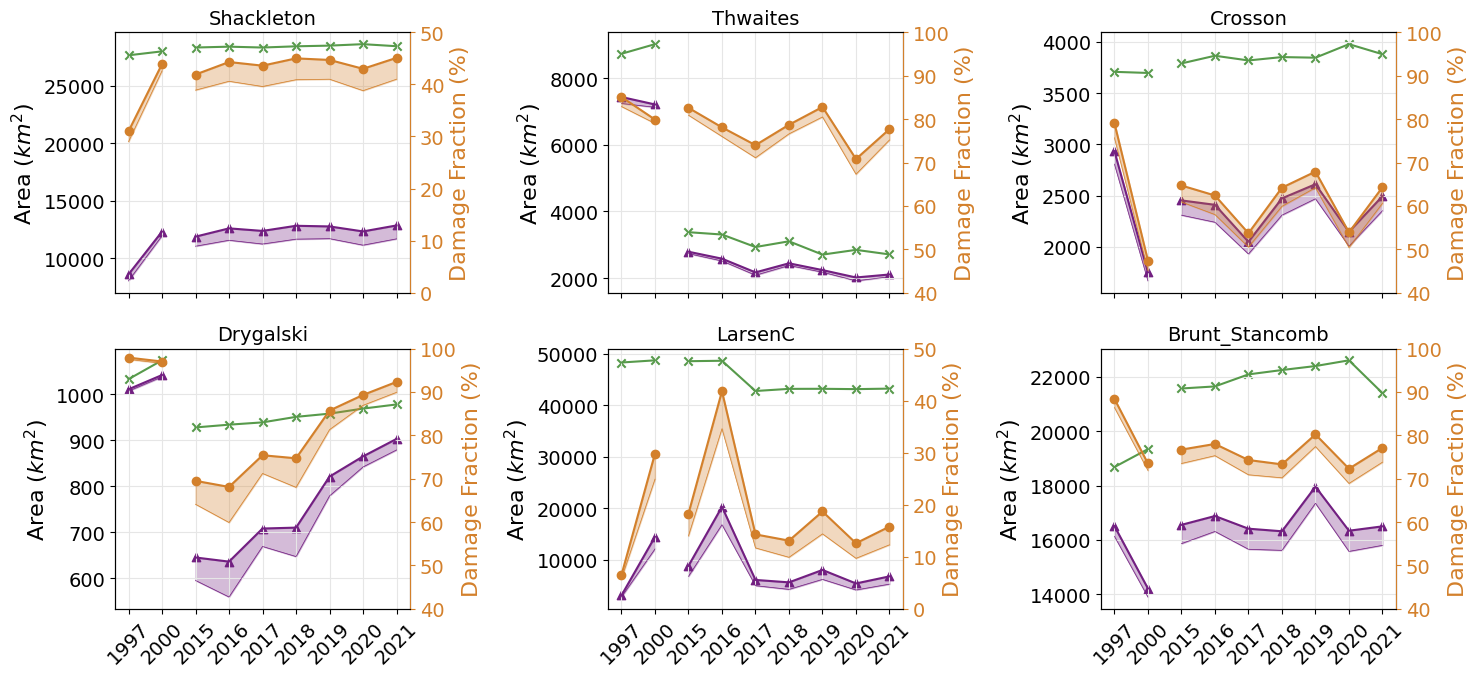

In [37]:

''' -----------------
## SUBPLOTS ICE SHELF
----------------- '''

fig, axs = plt.subplots(2, 3, figsize=(15, 7), sharex=True ) 
r=0;c=0
for i, ishelf in enumerate(['Shackleton','Thwaites','Crosson','Drygalski','LarsenC','Brunt_Stancomb']):
# for i, ishelf in enumerate(['Thwaites','Crosson','Brunt_Stancomb','Drygalski','LarsenC','Filchner']):
    data_plot = df_nerd.loc[df_nerd['NAME'] == ishelf]
    ax = axs[r, c]
    
    ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                        yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                        yvar_left2=('Area(km2)', 'Ice shelf area (km2)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=False,
                        ax_title = ishelf,
                        add_legend=False,
                        )

    if ishelf in ['LarsenC', 'Shackleton','Filchner']:
        ax2.set_ylim([0,50]) # larsen, shackleton
    else:
        ax2.set_ylim([40,100]) # others
    # ax2.set_ylim([0,50]) # larsen, shackleton
    # ax2.set_ylim([40,95]) # others
    

    
    c+=1; 
    if c>2:  c=0; r+=1

fig.tight_layout()




## Individual plots 

.. Saving  plot_timeseries_Area-DMG-Dfrac_annual_ishelf_Shackleton_v0_uncertainty_pct05


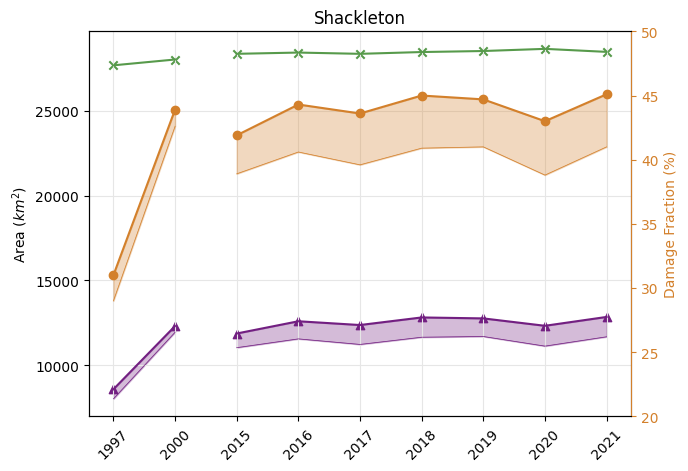

In [18]:


''' -----------------
## SINGLE PLOT PER ICE SHELF
----------------- '''
# for i, ishelf in enumerate(['Shackleton','LarsenC','Crosson','Brunt_Stancomb','Drygalski','Filchner','Thwaites']):#,'Crosson','Shackleton','Drygalski','LarsenC','Filchner']):
for i, ishelf in enumerate(['Shackleton']):
    data_plot = df_nerd.loc[df_nerd['NAME'] == ishelf]

    fig, axs = plt.subplots(1, figsize=(7, 5), sharex=True ) 
    ax = axs
    ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                        # yvar_left1=('#DMG', 'Damage area (px)'), 
                        # yvar_left2=('Npx', 'Ice shelf area(px)'), 
                        yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                        yvar_left2=('Area(km2)', 'Ice shelf area (km2)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=False,
                        ax_title = ishelf,
                        )
    # Remove the legend
    ax.legend().set_visible(False)

    if ishelf in ['LarsenC', 'Shackleton','Filchner']:
        # ax2.set_ylim([0,50]) # larsen, shackleton
        ax2.set_ylim([20,50])
    else:
        ax2.set_ylim([40,100]) # others

    # # # ### SAVE FIGURE
    # fname = f'plot_timeseries_Area-DMG-Dfrac_annual_ishelf_{ishelf}_v0_uncertainty_pct05'
    # print('.. Saving ', fname)
    # fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.png'), bbox_inches='tight')
    # fig.savefig(os.path.join(path2savefig,'bar_plots',fname +'.pdf'), bbox_inches='tight')





## plot AIS-wide

(0.0, 50.0)

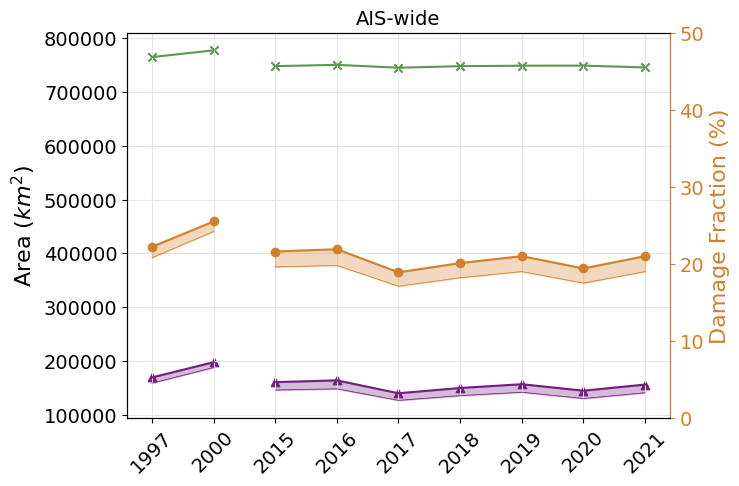

In [39]:

''' -----------------
## SINGLE PLOT  AIS
----------------- '''

data_plot = df_ais_sum 



fig, axs = plt.subplots(1, figsize=(7, 5), sharex=True ) 
ax = axs
ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                    # yvar_left1=('#DMG', 'Damage area (px)'), 
                    # yvar_left2=('Npx', 'Ice shelf area(px)'), 
                    yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                    yvar_left2=('Area(km2)', 'Ice shelf area (km2)'), 
                    yvar_right=('Dfrac', 'Dfrac(%)'),
                    yscale_log=False,
                    ax_title = 'AIS-wide',
                    )

ax.get_legend().remove()
# ax.set_yscale('log')
ax2.set_ylim([0,50])



In [40]:
df_ais_sum.sort_values('Dfrac')

,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac,Area(km2),DMG(km2),D_low,Dfrac_low
4,2017,3297.661603,744676,140527,383113,221036,73084,54004,13439,18.9,744676.0,140527.0,127363,17.1
7,2020,3356.100787,748601,145254,382293,221054,76136,55606,13512,19.4,748601.0,145254.0,130806,17.5
5,2018,3644.526572,747618,150331,376151,221136,77134,57468,15729,20.1,747618.0,150331.0,136131,18.2
6,2019,3884.647184,748438,157298,369905,221235,79304,61085,16909,21.0,748438.0,157298.0,142439,19.0
8,2021,3688.687054,745186,156646,367416,221124,81641,59386,15619,21.0,745186.0,156646.0,141460,19.0
2,2015,3665.852624,747634,161176,365544,220914,85643,60764,14769,21.6,747634.0,161176.0,146517,19.6
3,2016,3713.269682,750049,164426,364576,221047,89872,58936,15618,21.9,750049.0,164426.0,148782,19.8
0,1997,4347.294508,764407,169830,371713,222864,78739,77163,13928,22.2,764407.0,169830.0,159315,20.8
1,2000,5571.911853,776962,198233,356023,222706,77620,97626,22987,25.5,776962.0,198233.0,188300,24.2


In [41]:
print( 'mean uncertainty Dfrac: ', (df_ais_sum['Dfrac'] - df_ais_sum['Dfrac_low']).mean()) 
print( 'mean uncertainty D(km2): ', (df_ais_sum['#DMG'] - df_ais_sum['D_low']).mean()) 


mean uncertainty Dfrac:  1.8222222222222217
mean uncertainty D(km2):  13623.111111111111


## Plot Sector wide timeseries 

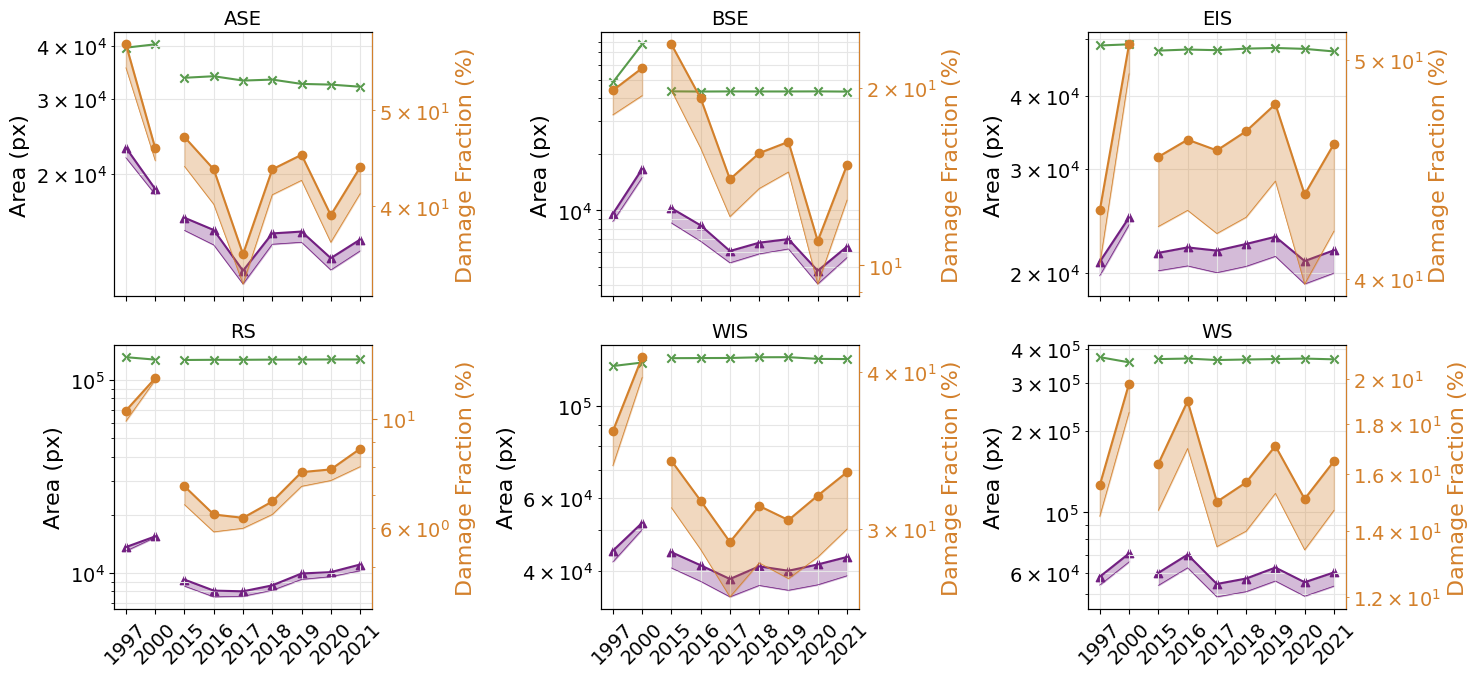

In [42]:

# df_sector_sum = df_data.groupby(['sector_ID','time']).sum().reset_index()

# df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)].copy()
# df_nerd['Dfrac'] = (df_nerd['#DMG']/df_nerd['Npx']*100).round(1) 




''' -----------------
## SUBPLOTS REGION
----------------- '''

fig, axs = plt.subplots(2, 3, figsize=(15, 7), sharex=True )  #(15,7)
r=0;c=0
for sector_ID in sector_IDs:
    data_plot = df_sector_sum.loc[df_sector_sum['sector_ID'] == sector_ID]
    ax = axs[r, c]

    ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                        yvar_left1=('#DMG', 'Damage area (px)'), 
                        yvar_left2=('Npx', 'Ice shelf area(px)'), 
                        # yvar_left2=('Npx_base', 'Ice shelf area(px)'), 
                        yvar_right=('Dfrac', 'Dfrac(%)'),
                        yscale_log=True,
                        ax_title = sector_ID,
                        add_legend=False
                        )
    # tmp: dummy right axis
    # ax2.set_ylabel('xx')


    c+=1; 
    if c>2:  c=0; r+=1
fig.tight_layout()



## scatter

In [43]:
# df_nerd

r_value 0.787, p_value: 8.802520e-200


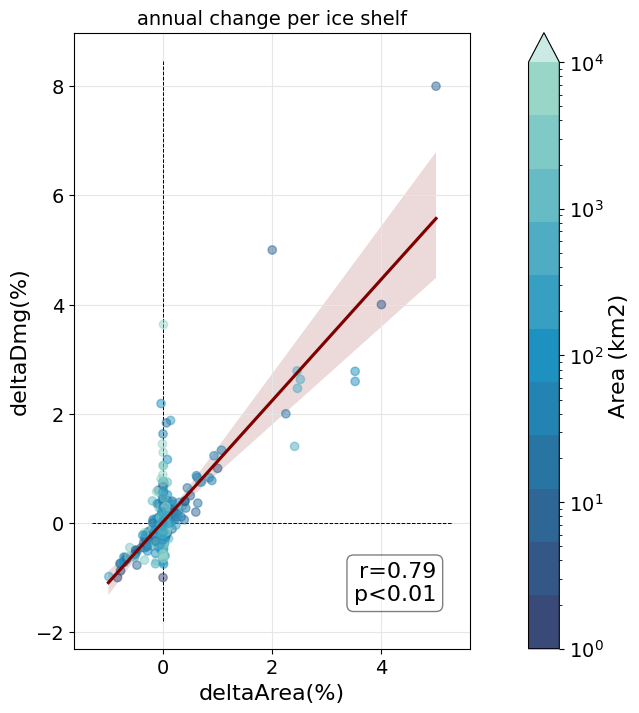

In [44]:
# df_data ## per ice hself per year

df_change = df_nerd[['NAME','time','Npx','#DMG','sector_ID','#mediumDMG','#highDMG','Area(km2)']].copy().reset_index()
# df_change = df_change
df_change['Dfrac'] = (df_change['#DMG']/df_change['Npx']*100).round(1) 

# df_sector_sum['Npx_pct_change'] = df_sector_sum.groupby(['sector_ID'])['Npx'].pct_change() #.fillna(0)
df_change['deltaArea(%)'] = df_change.groupby(['NAME'])['Npx'].pct_change()
df_change['deltaDmg(%)'] = df_change.groupby(['NAME'])['#DMG'].pct_change()
df_change['deltaDmg-med(%)'] = df_change.groupby(['NAME'])['#mediumDMG'].pct_change()
df_change['deltaDmg-hi(%)'] = df_change.groupby(['NAME'])['#highDMG'].pct_change()
df_change['deltaDfrac'] = df_change.groupby(['NAME'])['Dfrac'].diff()
df_change['deltaArea'] = df_change.groupby(['NAME'])['Npx'].diff()
df_change['deltaDmg'] = df_change.groupby(['NAME'])['#DMG'].diff()

# ## area in km2 instead of px
# px_res = 1000 ## used downsampled data
# df_change['Area(km2)'] = df_change['Npx']*px_res*px_res/(1e6)

df_change = df_change.dropna(subset=['deltaArea(%)','deltaDmg(%)'])
inf_rows = df_change[df_change['deltaDmg(%)'].isin([np.inf, -np.inf])]
df_change = df_change.drop(inf_rows.index)

## also drop icehslf > 100% area change
df_change = df_change.loc[df_change['deltaArea(%)'] < 100]

from sklearn.metrics import r2_score
R2 = r2_score(df_change['deltaArea(%)'], df_change['deltaDmg(%)'] )
R = np.sqrt(R2)

from scipy import stats
slope, intercept, r_value, p_value, _ = stats.linregress(df_change['deltaArea(%)'],df_change['deltaDmg(%)'])
print('r_value {:.3f}, p_value: {:e}'.format(r_value, p_value))

''' ----------------
Percent change with regression: zoombox
---------------- '''
alph = 0.5; 

# Create a custom colormap with a log scale
log_norm = mcolors.LogNorm(vmin=1, vmax=1e4)

fig,ax=plt.subplots(1,figsize=(15,8))
ax.grid('major',color=[0.9, 0.9, 0.9])
sc = ax.scatter(df_change['deltaArea(%)'], df_change['deltaDmg(%)'], c=df_change['Area(km2)'], # ['Npx'], 
            cmap=cmap_blues.reversed(), #vmin=0,vmax=Npx_vmax,
            norm=log_norm,
            alpha=alph, 
            # edgecolor=None, 
            zorder=3)
sns.regplot(data=df_change, x='deltaArea(%)', y='deltaDmg(%)', ax=ax, scatter=False, color='maroon')
plt.setp(ax.lines, zorder=5)
ax.vlines(0, *ax.get_ylim() ,linestyles='--',color='black', linewidth=0.7)
ax.hlines(0, *ax.get_xlim() ,linestyles='--',color='black', linewidth=0.7)
ax.set_title('annual change per ice shelf')

cbar = fig.colorbar(sc,ax=ax, extend='max',label='Area (km2)'); cbar.solids.set(alpha=1)
# ax.annotate('R={:.2f}\n P<0.01'.format(r_value), [4,-2],fontsize=16)
# Add a box around the text
bbox_props = dict(boxstyle="square,pad=0.5", edgecolor="black", facecolor="white", lw=1)
bbox_props = dict(boxstyle='round', facecolor='white', alpha=0.5)
ax.annotate('r={:.2f}\np<0.01'.format(r_value), 
                # [4.3, -1.8], 
                [5,-1.5], ha='right', va='bottom',
                fontsize=16, bbox=bbox_props)

ax.set_aspect('equal')


## Save to excel

In [46]:
df_ishelf_save = df_nerd[['NAME','sector_ID','time','Npx','#nodata','#DMG','Dfrac','D_low','Dfrac_low']]#.sort_values(['sector_ID','NAME','time'])
fname = 'damage_area_iceshelves_uncertainty_pct05.xlsx'

print('.. saving to ',fname)
saveTrue=False 

if saveTrue: 
    if os.path.exists(os.path.join(homedir,'Data/NERD/',fname)):
        print('File exists -- stop.' , os.path.join(homedir,'Data/NERD/',fname))
        # raise ValueError('File existis: ',os.path.join(homedir,'Data/NERD/',fname))
    
    else:
        with pd.ExcelWriter(os.path.join(homedir,'Data/NERD/',fname)) as writer:  
            # overview table
            # df_ishelf_save.to_excel(writer, sheet_name='overview', na_rep=-999)
            df_ishelf_save.sort_values(['NAME','time']).to_excel(writer, sheet_name='overview', na_rep=-999)

            # timeseires per variable: Npx
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='Npx')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='iceShelf_area', na_rep=-999, inf_rep=-999, header=True, index=False,)

            # timeseires per variable: DMG
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='#DMG')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='damaged_area', na_rep=-999, inf_rep=-999, header=True, index=False,)

            # timeseires per variable: Dfrac
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='Dfrac')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='damage_fraction', na_rep=-999, inf_rep=-999, header=True, index=False,)

            '''add uncertainty ''' 
            # timeseires per variable: DMG
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='D_low')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='damaged_area_lowBound', na_rep=-999, inf_rep=-999, header=True, index=False,)

            # timeseires per variable: Dfrac
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='Dfrac_low')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='damage_fraction_lowBound', na_rep=-999, inf_rep=-999, header=True, index=False,)

            ''' and nodata'''

            # timeseires per variable: Nodata
            df_pivot = df_ishelf_save.pivot_table(index=['NAME','sector_ID'], columns='time', values='#nodata')
            df_pivot.columns = [f'{x}' for x in df_pivot.columns]
            df_pivot = df_pivot.reset_index()#.sort_values(['sector_ID','NAME'])
            df_pivot.to_excel(writer, sheet_name='nodata_area', na_rep=-999, inf_rep=-999, header=True, index=False,)


.. saving to  damage_area_iceshelves_uncertainty_pct05.xlsx


# Values 
## AIS wide values long term


In [47]:
### AIS WIDE: values
# df_sector_sum = df_data.groupby(['time']).sum().reset_index()  # downsampled 400m res to 1000m 
# # df_sector_sum = df_data_1000.groupby(['time']).sum().reset_index()  # processed 1000m res
# df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
# df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]

df_tmp = df_ais_sum[df_ais_sum['time'].isin([1997,2021])].copy()
px_res = 1000

display(df_ais_sum)

## long term diff:
print(df_ais_sum[df_ais_sum['time']==1997]['#DMG'].values[0])
print('total ice shelf area 1997 {} km2'.format(  df_ais_sum[df_ais_sum['time']==1997]['Npx'].values[0]*px_res*px_res/(1e6) ) )
print('total dmg area 1997 {} km2'.format(  df_ais_sum[df_ais_sum['time']==1997]['#DMG'].values[0]*px_res*px_res/(1e6) ) )
print('PANG dmg area 2004 = 44744.59, 2009 = 42700, 2014=42980')
print('PANG changes: {}'.format( (42980-44744)/44744 * 100))
# print('PANG dmg area 2014=42980 km2')
# print('NeRD dmg area 2015={} km2; '.format(  df_ais_sum[df_ais_sum['time']==2015]['#DMG'].values[0]*px_res*px_res/(1e6) ) )

df_tmp[['Ddiff(km2)','Adiff(km2)']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.diff())*px_res*px_res/(1e6)
df_tmp[['Dpct','Apct']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_tmp = df_tmp.dropna(axis=0)
display(df_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']])


,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac,Area(km2),DMG(km2),D_low,Dfrac_low
0,1997,4347.294508,764407,169830,371713,222864,78739,77163,13928,22.2,764407.0,169830.0,159315,20.8
1,2000,5571.911853,776962,198233,356023,222706,77620,97626,22987,25.5,776962.0,198233.0,188300,24.2
2,2015,3665.852624,747634,161176,365544,220914,85643,60764,14769,21.6,747634.0,161176.0,146517,19.6
3,2016,3713.269682,750049,164426,364576,221047,89872,58936,15618,21.9,750049.0,164426.0,148782,19.8
4,2017,3297.661603,744676,140527,383113,221036,73084,54004,13439,18.9,744676.0,140527.0,127363,17.1
5,2018,3644.526572,747618,150331,376151,221136,77134,57468,15729,20.1,747618.0,150331.0,136131,18.2
6,2019,3884.647184,748438,157298,369905,221235,79304,61085,16909,21.0,748438.0,157298.0,142439,19.0
7,2020,3356.100787,748601,145254,382293,221054,76136,55606,13512,19.4,748601.0,145254.0,130806,17.5
8,2021,3688.687054,745186,156646,367416,221124,81641,59386,15619,21.0,745186.0,156646.0,141460,19.0


169830
total ice shelf area 1997 764407.0 km2
total dmg area 1997 169830.0 km2
PANG dmg area 2004 = 44744.59, 2009 = 42700, 2014=42980
PANG changes: -3.942428035043805


,Ddiff(km2),Adiff(km2),Dpct,Apct
8,-13184.0,-19221.0,-7.763057,-2.514498


In [48]:
### PER SECTOR
df_sector_sum = df_data.groupby(['sector_ID','time']).sum().reset_index()
# df_sector_sum = df_data_1000.groupby(['sector_ID','time']).sum().reset_index()

df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]
df_sec_tmp = df_nerd[df_nerd['time'].isin([1997,2021])].copy()

display(df_sec_tmp)

# 
df_sec_tmp[['Ddiff(km2)','Adiff(km2)']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.diff())*400*400/(1e6)
df_sec_tmp[['Dpct','Apct']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_sec_tmp = df_sec_tmp.dropna(axis=0)
display(df_sec_tmp[['sector_ID','Ddiff(km2)','Adiff(km2)','Dpct','Apct']])

df_sec_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']].describe()


# print('total ice shelf area 1997 {} km2'.format(  764407*400*400/(1e6) ) )

,sector_ID,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
0,ASE,1997,544.534587,39546,23044,15898,604,10063,11410,1571,58.3
8,ASE,2021,407.335546,32031,14035,17851,145,5474,6781,1780,43.8
9,BSE,1997,272.680592,48453,9594,38859,0,5221,3621,752,19.8
17,BSE,2021,149.899741,43229,6410,36819,0,3682,2032,696,14.8
18,EIS,1997,604.525590,48679,20884,27338,457,9377,9746,1761,42.9
26,EIS,2021,486.249962,47559,21836,25230,493,11350,8754,1732,45.9
27,RS,1997,430.113422,130887,13588,33535,83764,4921,6671,1996,10.4
35,RS,2021,430.342998,127341,11035,33650,82656,4239,4082,2714,8.7
36,WIS,1997,1193.976629,124606,44681,67359,12566,21237,19491,3953,35.9
44,WIS,2021,960.587526,129518,43155,73778,12585,23286,15983,3886,33.3


,sector_ID,Ddiff(km2),Adiff(km2),Dpct,Apct
8,ASE,-1441.44,-1202.40,-39.094775,-19.003186
17,BSE,-509.44,-835.84,-33.187409,-10.781582
26,EIS,152.32,-179.20,4.558514,-2.300787
35,RS,-408.48,-567.36,-18.788637,-2.709207
44,WIS,-244.16,785.92,-3.415322,3.942025
53,WS,341.76,-1076.48,3.680284,-1.807455


,Ddiff(km2),Adiff(km2),Dpct,Apct
count,6.000000,6.000000,6.000000,6.000000
mean,-351.573333,-512.560000,-14.374558,-5.443365
std,626.438637,734.653277,18.915813,8.136610
min,-1441.440000,-1202.400000,-39.094775,-19.003186
25%,-484.200000,-1016.320000,-29.587716,-8.763488
50%,-326.320000,-701.600000,-11.101979,-2.504997
75%,53.200000,-276.240000,1.906382,-1.930788
max,341.760000,785.920000,4.558514,3.942025


## Dmg change

### 1997 to 2021

In [49]:
### AIS WIDE: values
df_sector_sum = df_data.groupby(['time']).sum().reset_index()  # downsampled 400m res to 1000m 
# df_sector_sum = df_data_1000.groupby(['time']).sum().reset_index()  # processed 1000m res
df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]

y0 = 1997
y1 = 2021
df_tmp = df_nerd[df_nerd['time'].isin([y0,y1])].copy()
px_res = 1000

display(df_nerd)

print(f'{y0}-{y1}')
print('total ice shelf area y0 {} km2'.format(  df_nerd[df_nerd['time']==y0]['Npx'].values[0]*px_res*px_res/(1e6) ) )
print('total dmg area y0 {} km2'.format(  df_nerd[df_nerd['time']==y0]['#DMG'].values[0]*px_res*px_res/(1e6) ) )

df_tmp[['Ddiff(km2)','Adiff(km2)']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.diff())*px_res*px_res/(1e6)
df_tmp[['Dpct','Apct']] = df_tmp[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_tmp = df_tmp.dropna(axis=0)
display(df_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']])


,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
0,1997,4347.294508,764407,169830,371713,222864,78739,77163,13928,22.2
1,2000,5571.911853,776962,198233,356023,222706,77620,97626,22987,25.5
2,2015,3665.852624,747634,161176,365544,220914,85643,60764,14769,21.6
3,2016,3713.269682,750049,164426,364576,221047,89872,58936,15618,21.9
4,2017,3297.661603,744676,140527,383113,221036,73084,54004,13439,18.9
5,2018,3644.526572,747618,150331,376151,221136,77134,57468,15729,20.1
6,2019,3884.647184,748438,157298,369905,221235,79304,61085,16909,21.0
7,2020,3356.100787,748601,145254,382293,221054,76136,55606,13512,19.4
8,2021,3688.687054,745186,156646,367416,221124,81641,59386,15619,21.0


1997-2021
total ice shelf area y0 764407.0 km2
total dmg area y0 169830.0 km2


,Ddiff(km2),Adiff(km2),Dpct,Apct
8,-13184.0,-19221.0,-7.763057,-2.514498


### 2015-2021

In [50]:
### PER SECTOR
df_sector_sum = df_data.groupby(['sector_ID','time']).sum().reset_index()
# df_sector_sum = df_data_1000.groupby(['sector_ID','time']).sum().reset_index()

df_sector_sum['Dfrac'] = (df_sector_sum['#DMG']/df_sector_sum['Npx']*100).round(1) 
df_nerd = df_sector_sum[~df_sector_sum['time'].between(2004, 2014)]
df_sec_tmp = df_nerd[df_nerd['time'].isin([2015,2021])].copy()

display(df_sec_tmp)
# 
df_sec_tmp[['Ddiff(km2)','Adiff(km2)']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.diff())*400*400/(1e6)
df_sec_tmp[['Dpct','Apct']] = df_sec_tmp.groupby(['sector_ID'])[['#DMG','Npx']].transform(lambda x: x.pct_change())*100
df_sec_tmp = df_sec_tmp.dropna(axis=0)
display(df_sec_tmp[['sector_ID','Ddiff(km2)','Adiff(km2)','Dpct','Apct']])

df_sec_tmp[['Ddiff(km2)','Adiff(km2)','Dpct','Apct']].describe()



,sector_ID,time,Dsum,Npx,#DMG,#noDMG,#nodata,#lowDMG,#mediumDMG,#highDMG,Dfrac
2,ASE,2015,418.875696,33614,15792,17677,145,6608,7531,1653,47.0
8,ASE,2021,407.335546,32031,14035,17851,145,5474,6781,1780,43.8
11,BSE,2015,174.500461,43352,10283,33069,0,7120,2451,712,23.7
17,BSE,2021,149.899741,43229,6410,36819,0,3682,2032,696,14.8
20,EIS,2015,477.751899,47713,21618,25633,462,10783,9196,1639,45.3
26,EIS,2021,486.249962,47559,21836,25230,493,11350,8754,1732,45.9
29,RS,2015,275.523419,126565,9218,34691,82656,4176,3694,1348,7.3
35,RS,2021,430.342998,127341,11035,33650,82656,4239,4082,2714,8.7
38,WIS,2015,957.802220,130174,44321,73192,12661,24310,16551,3460,34.0
44,WIS,2021,960.587526,129518,43155,73778,12585,23286,15983,3886,33.3


,sector_ID,Ddiff(km2),Adiff(km2),Dpct,Apct
8,ASE,-281.12,-253.28,-11.125887,-4.709347
17,BSE,-619.68,-19.68,-37.664106,-0.283724
26,EIS,34.88,-24.64,1.008419,-0.322763
35,RS,290.72,124.16,19.711434,0.613124
44,WIS,-186.56,-104.96,-2.630807,-0.503941
53,WS,36.96,-113.28,0.385360,-0.193329


,Ddiff(km2),Adiff(km2),Dpct,Apct
count,6.000000,6.000000,6.000000,6.000000
mean,-120.800000,-65.280000,-5.052598,-0.899997
std,315.398581,125.571482,18.898809,1.906301
min,-619.680000,-253.280000,-37.664106,-4.709347
25%,-257.480000,-111.200000,-9.002117,-0.458646
50%,-75.840000,-64.800000,-1.122724,-0.303244
75%,36.440000,-20.920000,0.852654,-0.215927
max,290.720000,124.160000,19.711434,0.613124


# Plot larsen C calving A68

In [27]:



''' ---------
### Load files
------------ '''

path2agg = os.path.join(homedir,'Data/NERD/DMG_aggregated/_larsenC-AOI/')
years_list = [1997,2000, 2015, 2016,2017,2018,2019,2020,2021]
df_LC = df_year_AIS = gpd.read_file(os.path.join(path2agg, 'aggregated_dmg_per_iceshelf_LC-A68-small_1000m.shp')) ## has geometry, but no column with easy accessible sector_ID

df_LC_p05 = df_year_AIS = gpd.read_file(os.path.join(path2agg, 'aggregated_dmg_per_iceshelf_LC-A68-small_strict-bias_1000m.shp')) ## has geometry, but no column with easy accessible sector_ID

px_res = 1000 ## used downsampled data

df_LC_plot = data_prep(df_LC.copy(), df_LC_p05.copy(),px_res=1000) 


/var/folders/f9/fhss4qg93y1b2w6dgpbxxwvw0000gn/T/ipykernel_63170/1754631458.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_yticklabels(yint)


.. Saving  plot_timeseries_Area-DMG-Dfrac_annual_ishelf_LC-A68_uncertainty


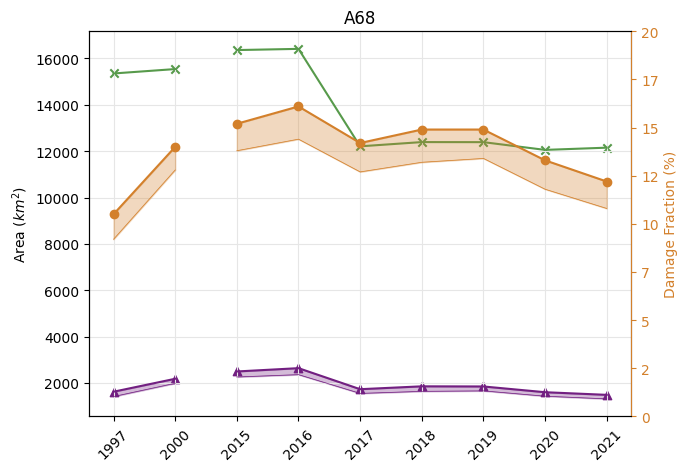

In [43]:
# df_data
# path2savefig = 

# path2savefig = os.path.join(homedir,'Data/NERD/plots_dev/')
''' -----------------
## SINGLE PLOT PER ICE SHELF
----------------- '''
# for i, ishelf in enumerate(['A68']):#,'Crosson','Shackleton','Drygalski','LarsenC','Filchner']):
#     data_plot = df_nerd.loc[df_nerd['NAME'] == ishelf]
ishelf= 'A68'
data_plot = df_LC_plot.copy() 


fig, axs = plt.subplots(1, figsize=(7, 5), sharex=True ) 
ax = axs
ax, ax2 = plot_axes_area_dmg_dfrac(ax, data_plot, 
                    # yvar_left1=('#DMG', 'Damage area (px)'), 
                    # yvar_left2=('Npx', 'Ice shelf area(px)'), 
                    yvar_left1=('DMG(km2)', 'Damaged area (km2)'), 
                    yvar_left2=('Area(km2)', 'Ice shelf area (km2)'), 
                    yvar_right=('Dfrac', 'Dfrac(%)'),
                    yscale_log=False,
                    ax_title = ishelf,
                    )
# Remove the legend
ax.legend().set_visible(False)
ax2.set_ylim([0,20]) # larsen, shackleton

yint = []
locs = ax2.get_yticks()
for each in locs:
    yint.append(int(each))
ax2.set_yticklabels(yint)

